In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
img1 = cv.imread('van_mieu_1.jpg',cv.IMREAD_GRAYSCALE)         
img2 = cv.imread('van_mieu_2.jpg',cv.IMREAD_GRAYSCALE) 
img2 = cv.pyrDown(img2)

In [3]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [4]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [5]:
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

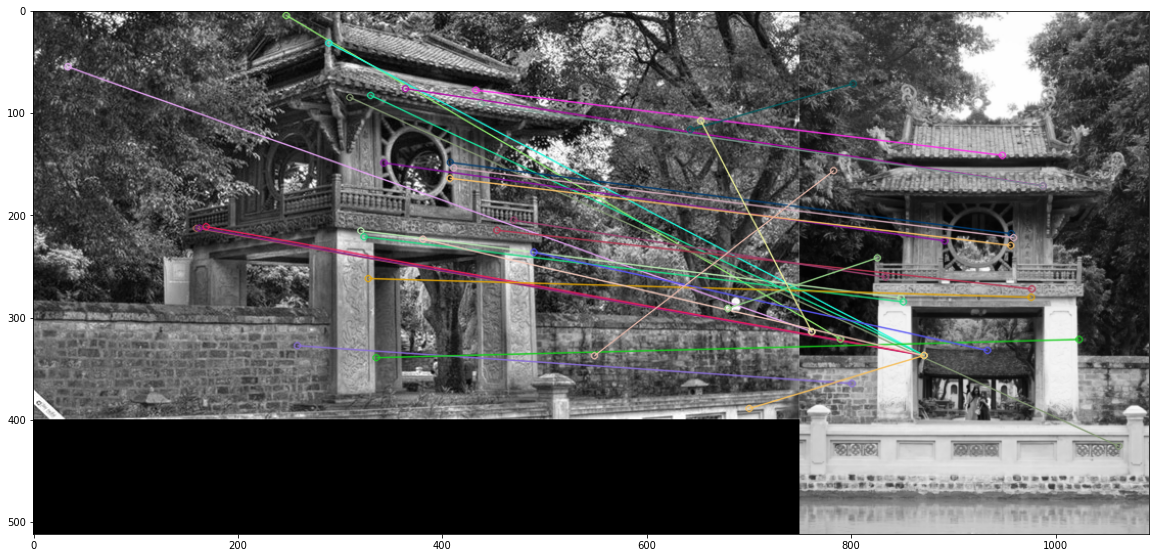

In [6]:
plt.figure(figsize=(20, 20))
plt.imshow(img3)